In [2]:
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

In [5]:
import pandas as pd
df = pd.read_csv(data_url, header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
y

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, stratify = y, random_state=0)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
import numpy as np
X_train_scaled[0]
np.mean(X_test_scaled)

-0.10695461604011372

In [22]:
cov_mat = np.cov(X_train_scaled.T)
cov_mat.shape

(13, 13)

In [23]:
eigen_values, eigen_vectors = np.linalg.eig(cov_mat)

In [28]:
eigen_values.shape

(13,)

In [ ]:
eigen_values[0]*eigen_vectors[: ,0]

In [ ]:
np.dot(cov_mat,eigen_vectors[:,0])

In [29]:
import matplotlib.pyplot as plt

In [33]:
tot = sum(eigen_values)
var_explained = [(eigen_val/tot) for eigen_val in sorted(eigen_values, reverse=True)]

In [ ]:
var_explained

In [36]:
cum_var_exp = np.cumsum(var_explained)
cum_var_exp*100

array([ 36.9514686 ,  55.38639566,  67.20155475,  74.53580652,
        80.95791434,  86.00963882,  89.96429272,  92.60821103,
        94.99753029,  96.62714407,  98.00716519,  99.17939143,
       100.        ])

Text(0.5, 0, 'Principal component')

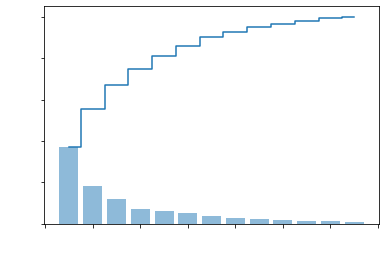

In [40]:
plt.bar(range(1,14), var_explained, alpha=0.5, align="center")
plt.step(range(1,14), cum_var_exp, where='mid')
plt.xticks(color ="white")
plt.yticks(color ="white")
plt.ylabel("Explained variance", color = "White")
plt.xlabel("Principal component",color = "White")

In [43]:
# Transform features
sorted_index = pd.Series(eigen_values).sort_values(ascending=False).index
sorted_index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 11, 9], dtype='int64')

In [44]:
w = eigen_vectors[:, sorted_index[:2]]
w

array([[-0.13724218,  0.50303478],
       [ 0.24724326,  0.16487119],
       [-0.02545159,  0.24456476],
       [ 0.20694508, -0.11352904],
       [-0.15436582,  0.28974518],
       [-0.39376952,  0.05080104],
       [-0.41735106, -0.02287338],
       [ 0.30572896,  0.09048885],
       [-0.30668347,  0.00835233],
       [ 0.07554066,  0.54977581],
       [-0.32613263, -0.20716433],
       [-0.36861022, -0.24902536],
       [-0.29669651,  0.38022942]])

In [50]:
X_test_pca = X_test_scaled.dot(w)
X_test_pca.shape

(54, 2)

In [51]:
X_train_pca = X_train_scaled.dot(w)
X_train_pca.shape

(124, 2)

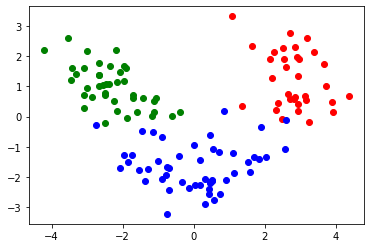

In [52]:
colors = ["r","g","b"]
for label, color in zip(y_train.unique(), colors):
    plt.scatter(X_train_pca[y_train==label,0], X_train_pca[y_train==label,1], c=color, label=label)